In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

from thesis_v2 import dir_dict

In [2]:
from scipy.stats import sem
import numpy as np

In [3]:
import pandas as pd

In [4]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'source_analysis.pkl')
df_main_result = pd.read_pickle(f_main_result)

In [5]:
f_main_result_perf = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')
df_main_result_perf = pd.read_pickle(f_main_result_perf)

In [6]:
df_main_result = df_main_result.join(df_main_result_perf[['cc2_normed_avg']], how='inner')

In [7]:
df_main_result

num_param  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep              
relu     False                mse       0          2         8           1           cm-avg       1280            17461   
                                                                                                  2560            17461   
                                                                                                  5120            17461   
                                                                                     cm-last      1280            17461   
                                                                                                  2560            17461   
...                                                                                                                 ...   
softplus True                 poisson   1          6         16          1           legacy       2560            29837   
                                                                                                  5120            29837   
                                                             32          1           legacy       1280            67149   
                                                                                                  2560            67149   
                                                                                                  5120            67149   

                                                                                                                                source_analysis  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                      
relu     False                mse       0          2         8           1           cm-avg       1280        {('I', 'B1'): 0.7241598808209915}   
                                                                                                  2560         {('I', 'B1'): 2.134264596867908}   
                                                                                                  5120         {('I', 'B1'): 2.870888935845869}   
                                                                                     cm-last      1280        {('I', 'B1'): 0.7241598808209915}   
                                                                                                  2560         {('I', 'B1'): 2.134264596867908}   
...                                                                                                                                         ...   
softplus True                 poisson   1          6         16          1           legacy       2560                                     None   
                                                                                                  5120                                     None   
                                                             32          1           legacy       1280                                     None   
                                                                                                  2560                                     None   
                                                                                                  5120                                     None   

                                                                                                              cc2_normed_avg  
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                  
relu     False                mse       0          2         8           1           cm-avg       1280              0.357125  
                                                                                                  2560              0.524376  
                                                                                          

In [8]:
# remove those with layer >= 8
df_main_result = df_main_result.loc[df_main_result.index.get_level_values('rcnn_bl_cls') <= 7]
df_main_result = df_main_result.sort_index()
df_main_result

num_param  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep              
relu     False                mse       0          2         8           1           cm-avg       1280            17461   
                                                                                                  2560            17461   
                                                                                                  5120            17461   
                                                                                     cm-last      1280            17461   
                                                                                                  2560            17461   
...                                                                                                                 ...   
softplus True                 poisson   1          6         16          1           legacy       2560            29837   
                                                                                                  5120            29837   
                                                             32          1           legacy       1280            67149   
                                                                                                  2560            67149   
                                                                                                  5120            67149   

                                                                                                                                source_analysis  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                      
relu     False                mse       0          2         8           1           cm-avg       1280        {('I', 'B1'): 0.7241598808209915}   
                                                                                                  2560         {('I', 'B1'): 2.134264596867908}   
                                                                                                  5120         {('I', 'B1'): 2.870888935845869}   
                                                                                     cm-last      1280        {('I', 'B1'): 0.7241598808209915}   
                                                                                                  2560         {('I', 'B1'): 2.134264596867908}   
...                                                                                                                                         ...   
softplus True                 poisson   1          6         16          1           legacy       2560                                     None   
                                                                                                  5120                                     None   
                                                             32          1           legacy       1280                                     None   
                                                                                                  2560                                     None   
                                                                                                  5120                                     None   

                                                                                                              cc2_normed_avg  
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                  
relu     False                mse       0          2         8           1           cm-avg       1280              0.357125  
                                                                                                  2560              0.524376  
                                                                                          

In [9]:
def get_normalized_vec(x):
    if x is None:
        return None
    keys = [('I',) + ('B1',) + ('R1',)*i for i in range(7)]
    assert x.keys() <= set(keys)
    ret = np.zeros((len(keys),))
    assert ret.shape == (7,)
    for idx, key in enumerate(keys):
        ret[idx] = x.get(key, 0.0)
    ret = ret/ret.sum()
    return ret
    



df_main_result['source_analysis_vec'] = df_main_result['source_analysis'].map(lambda x: get_normalized_vec(x))

In [10]:
# show mean vs sem, for different cls

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
def plot_vec_bars(ax, df_this):
    data = np.asarray([x for x in df_this['source_analysis_vec'].values])
    assert data.shape == (50, 7)
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    perf = df_this['cc2_normed_avg']
    print(perf.mean(), perf.std())
    
    ax.bar(x=np.arange(7), height=data_mean, yerr=data_std)
    ax.set_ylim(0, 1.0)

[8, 2]
112 672
0.4464277902759867 0.02462914781689206
0.3501574993511559 0.056893490048526396


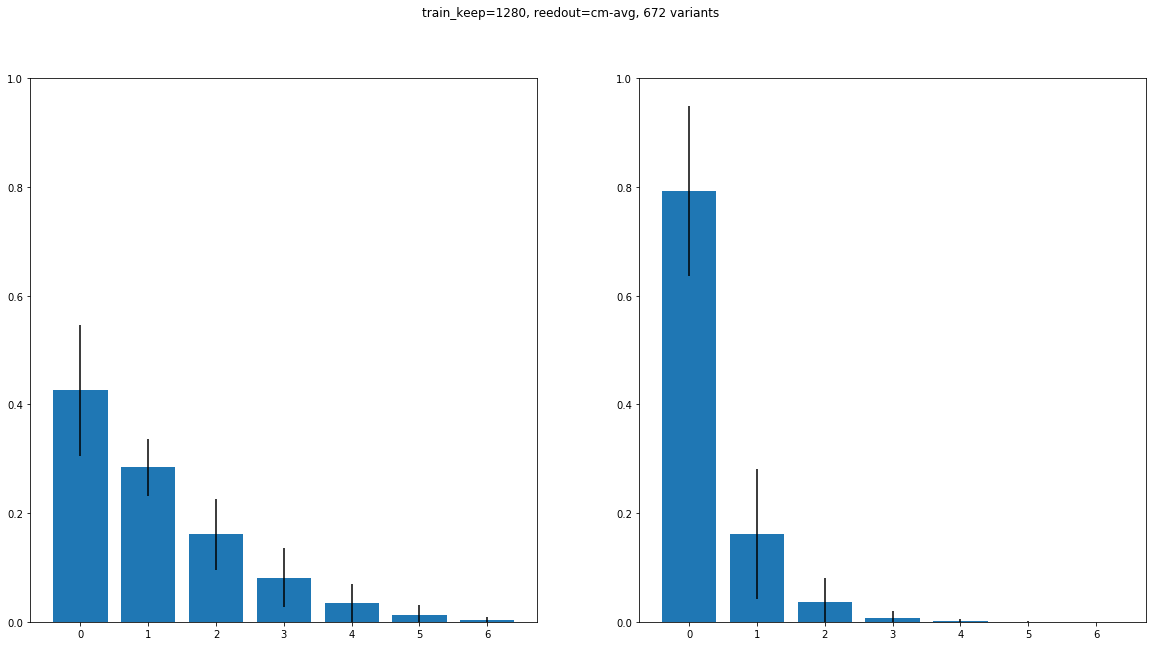

[8, 3]
112 672
[16, 2]
112 672
0.5065227382123444 0.021421663597655995
0.42383014415981307 0.033904363885646806


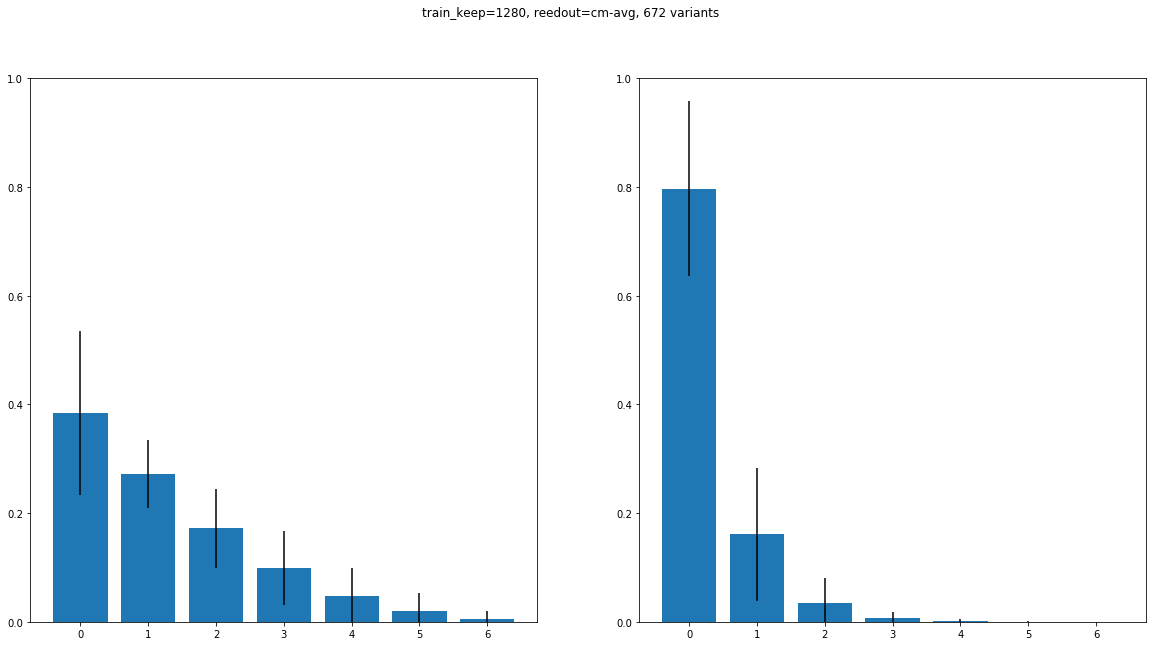

[16, 3]
112 672
[32, 2]
112 672
0.5473595177026764 0.014791656420983148
0.4725829621771374 0.037986476349236444


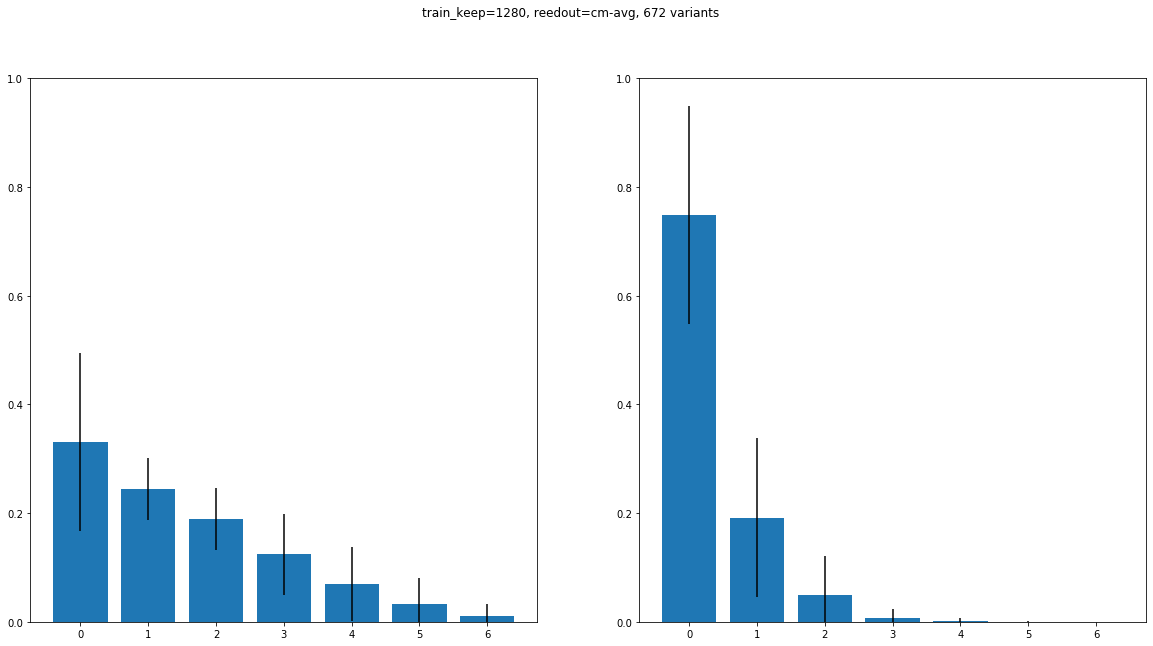

[32, 3]
112 672
[8, 2]
112 672
0.46670370581185894 0.027175984540882926
0.3429470730893051 0.06753285046785529


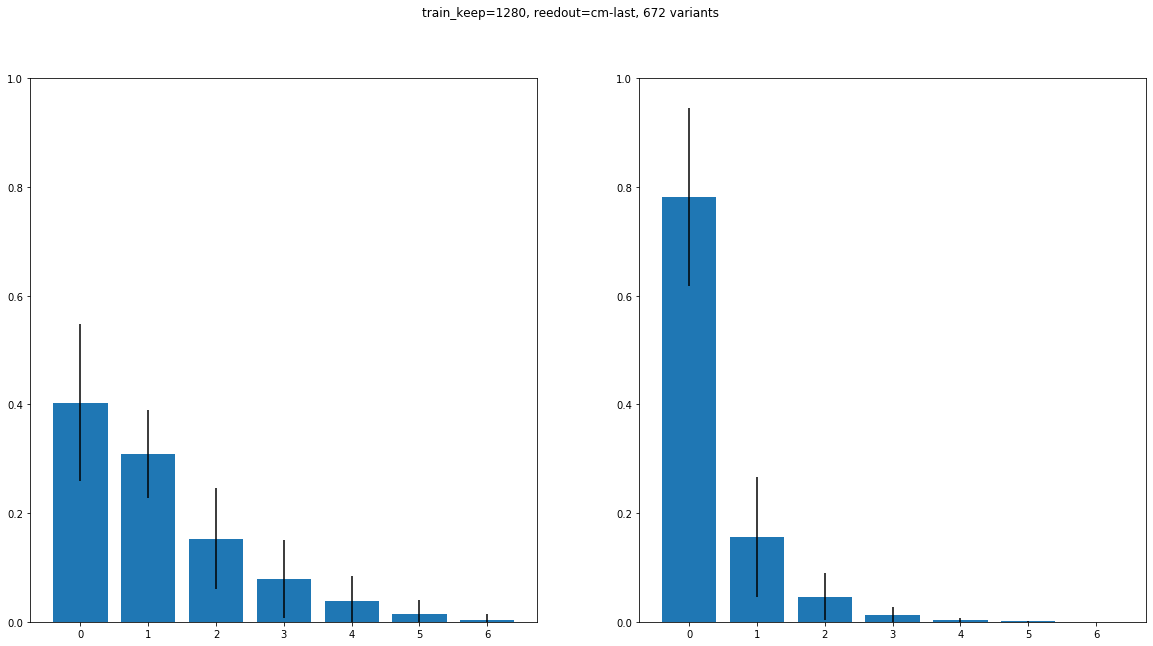

[8, 3]
112 672
[16, 2]
112 672
0.5214139859140446 0.019529323792809205
0.433229401172528 0.040263854929651774


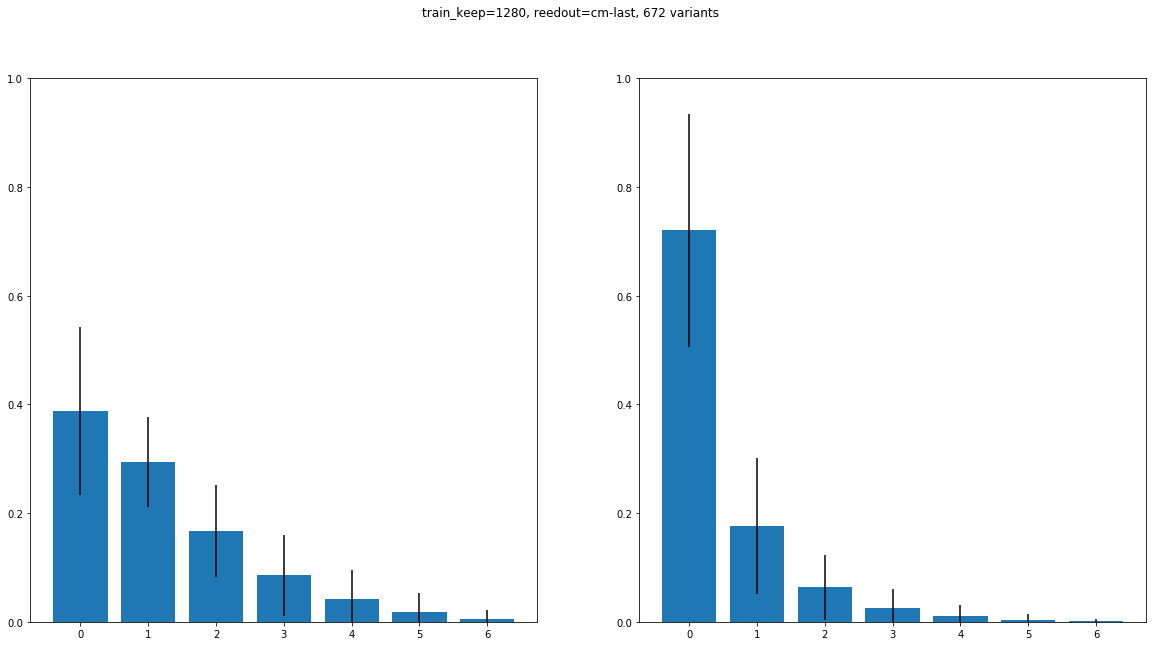

[16, 3]
112 672
[32, 2]
112 672
0.5527719326169526 0.014328709668492992
0.4800850590367045 0.040799607477216344


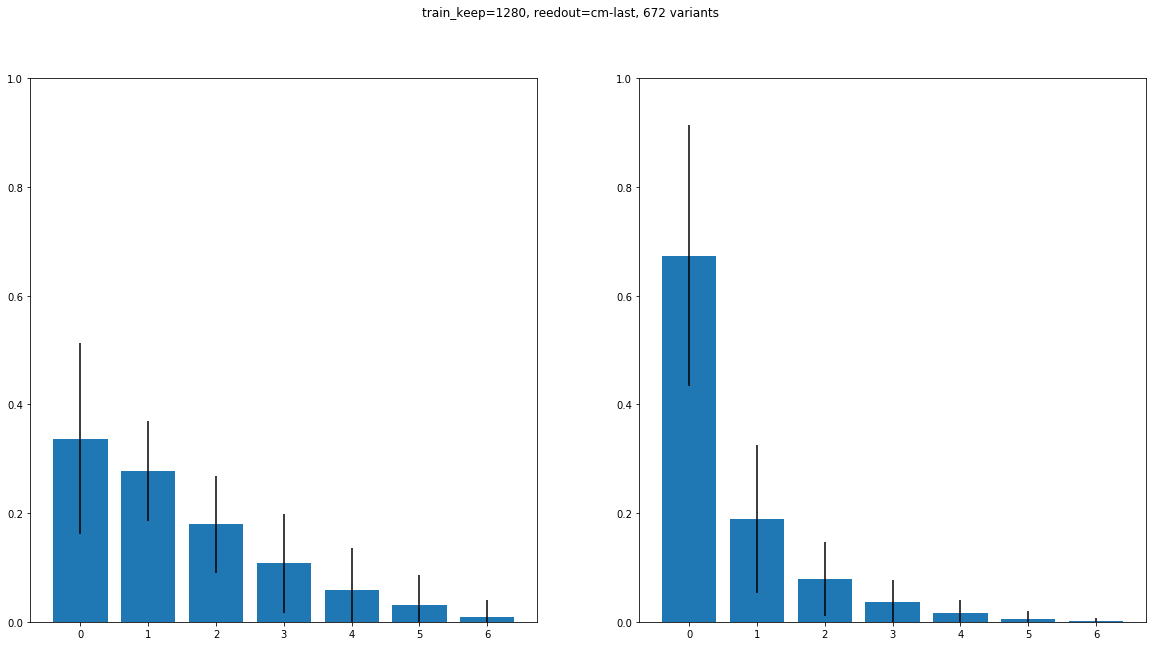

[32, 3]
112 672
[8, 2]
112 672
0.4467109949179556 0.026414144999542054
0.3333736049805517 0.0595831646549151


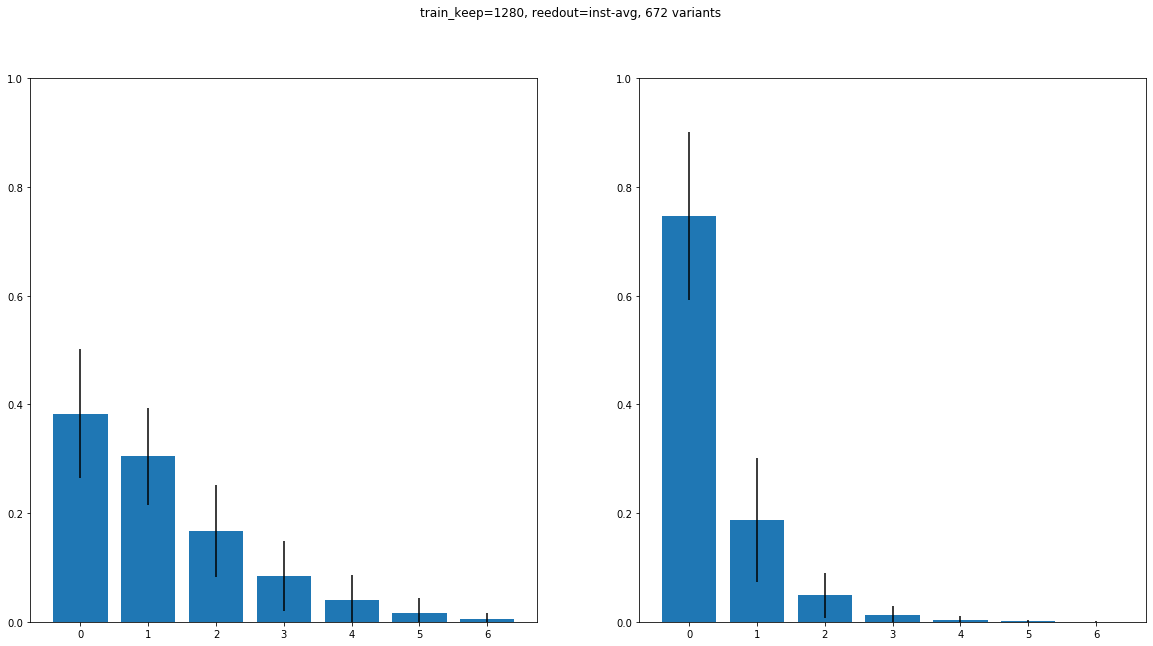

[8, 3]
112 672
[16, 2]
112 672
0.5101242822539624 0.021907882131225468
0.42976809501610774 0.03412950041145667


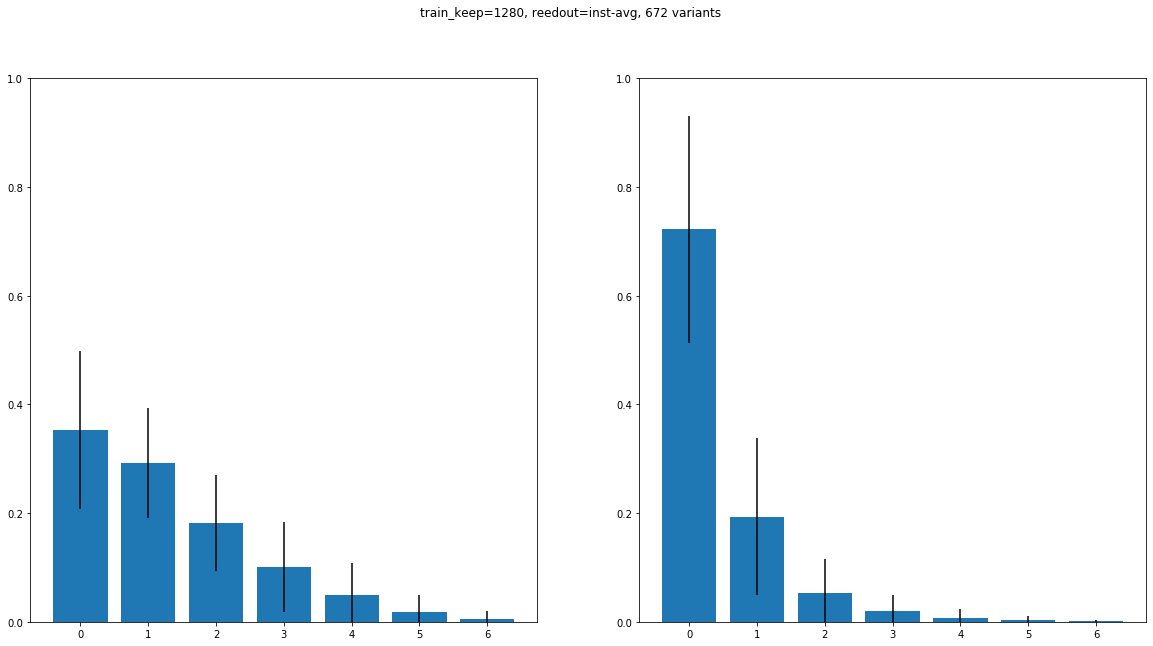

[16, 3]
112 672
[32, 2]
112 672
0.5457593524675841 0.016476631779118792
0.47678395810917984 0.03754838925202405


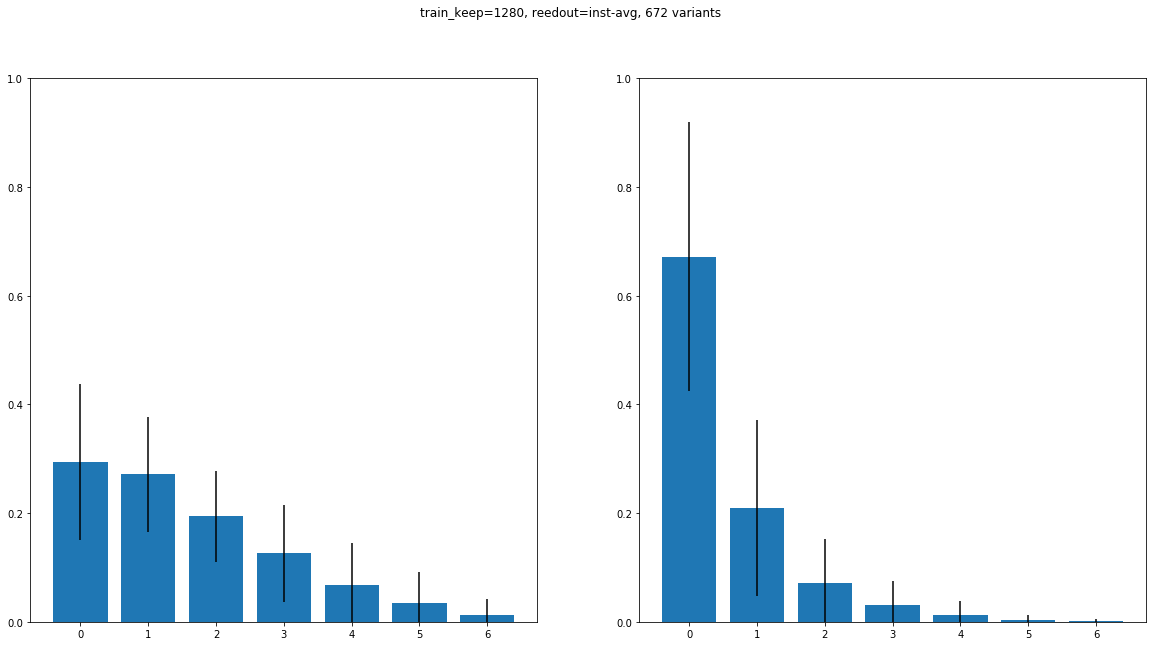

[32, 3]
112 672
[8, 2]
112 672
0.45571780064542694 0.03076299684182962
0.3459725270751698 0.055292145425432516


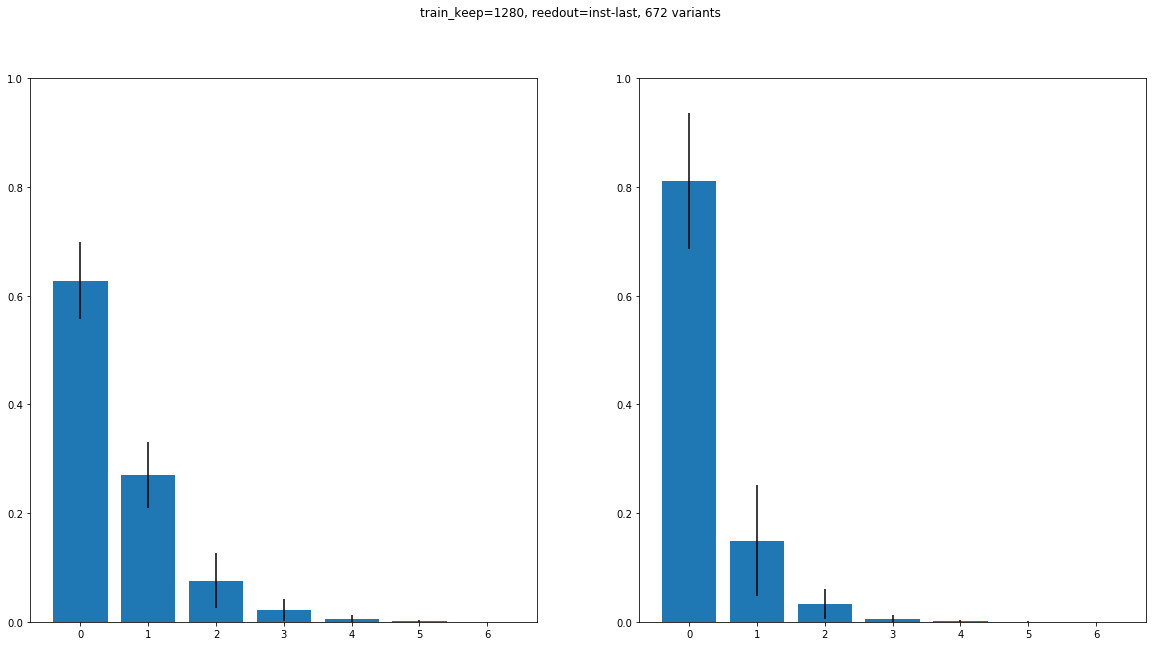

[8, 3]
112 672
[16, 2]
112 672
0.507719254310363 0.02460297689860816
0.420140906778509 0.03399125409660705


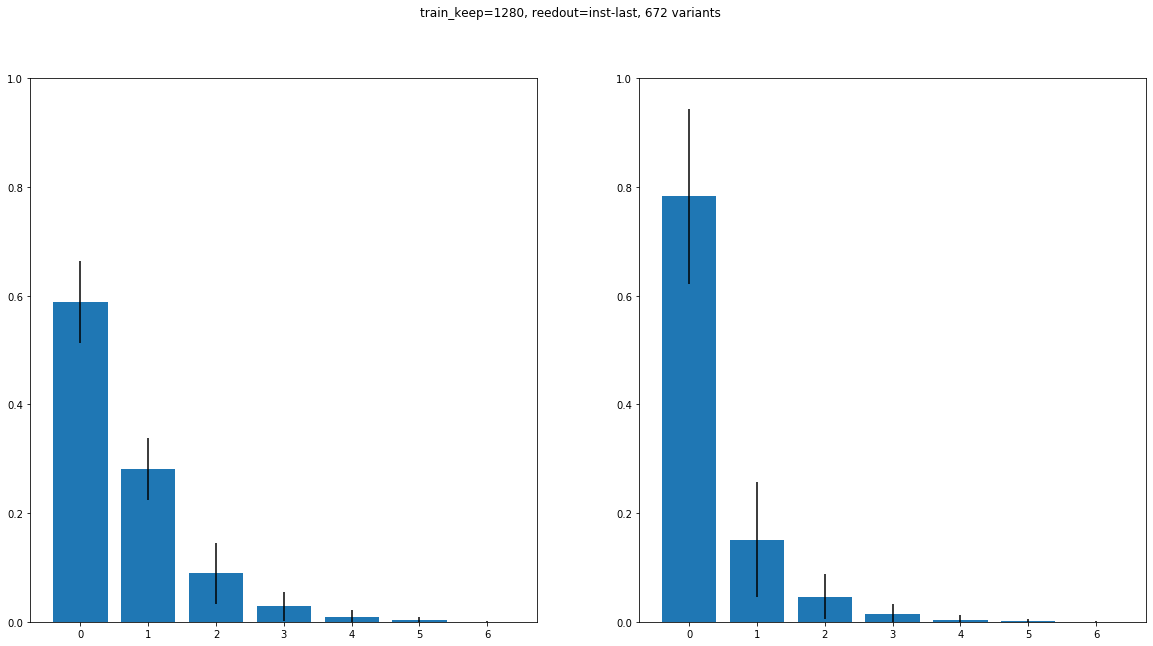

[16, 3]
112 672
[32, 2]
112 672
0.5367793672834233 0.023455898850278864
0.4512320277422394 0.027327535453072503


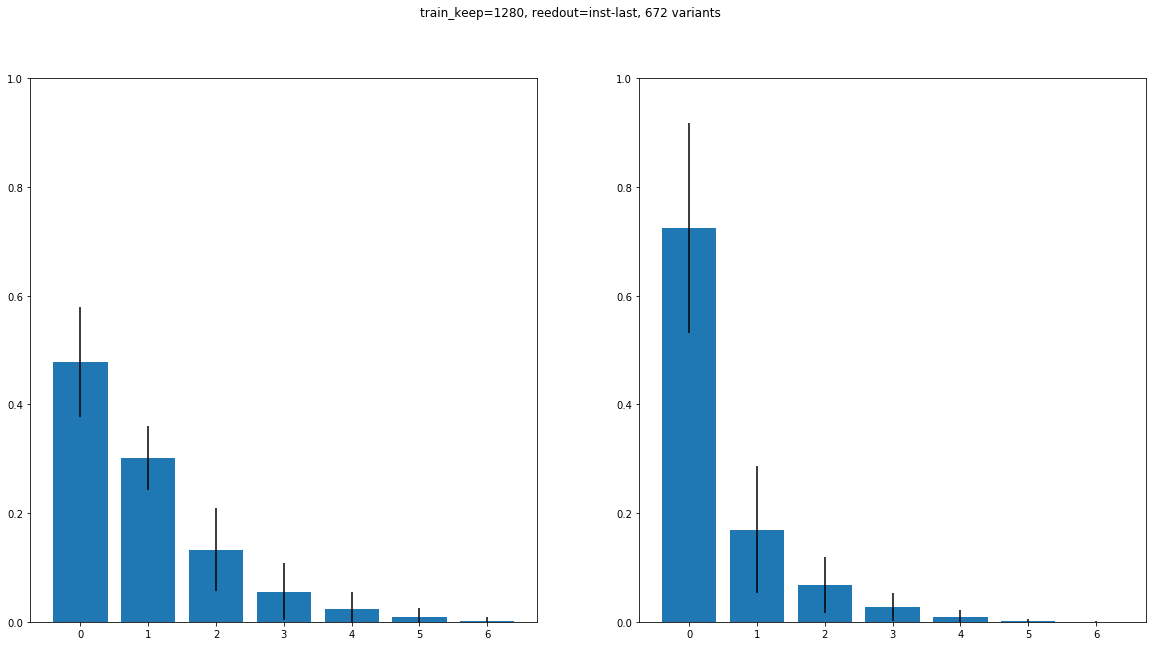

[32, 3]
112 672
[8, 2]
112 672
0.553507611127175 0.009290925386827836
0.5099894658434757 0.02134090766905793


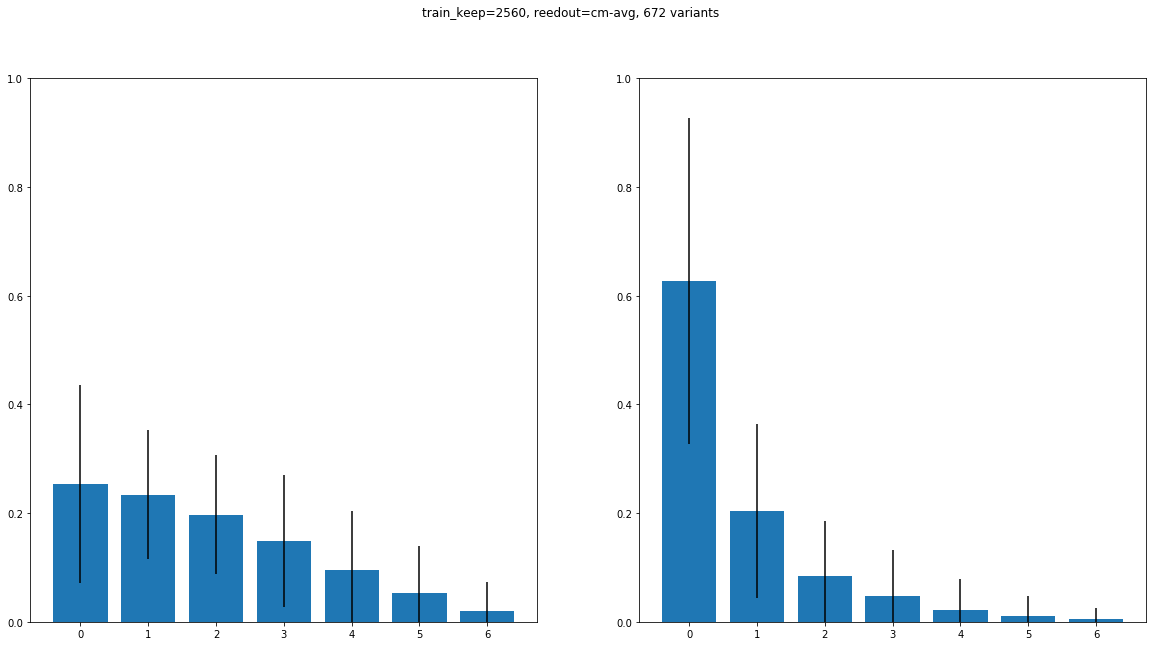

[8, 3]
112 672
[16, 2]
112 672
0.6002043573436457 0.008584520908435382
0.5530486302245863 0.024559401649323485


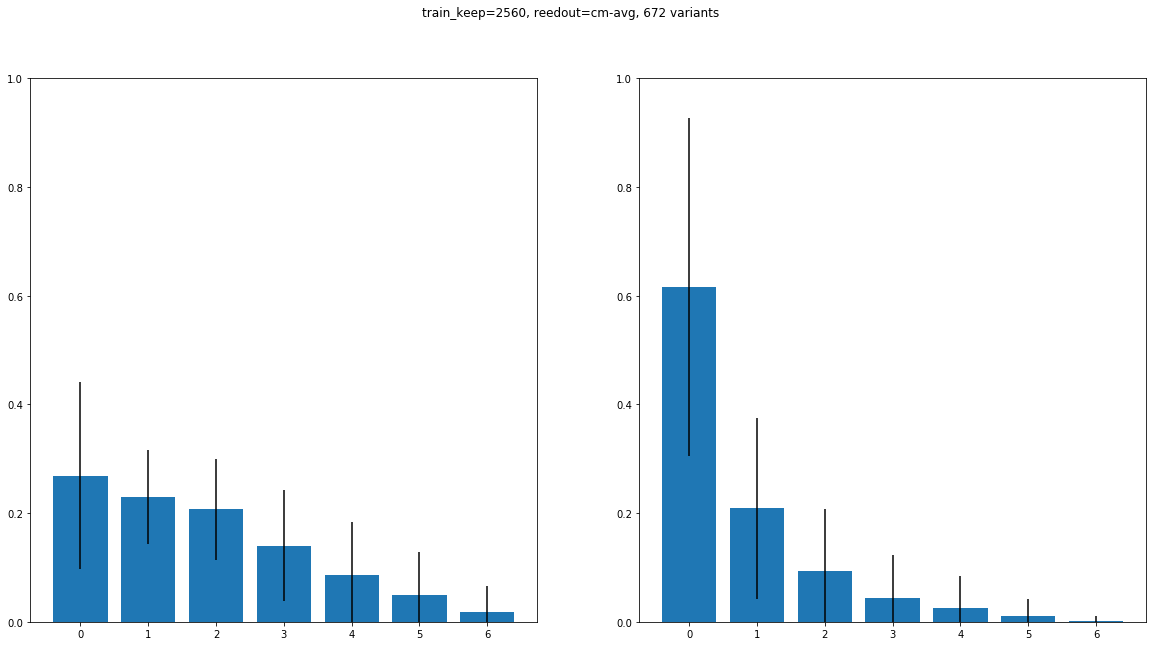

[16, 3]
112 672
[32, 2]
112 672
0.6245306083870625 0.0072553616131331945
0.5757649782329102 0.02557428030375626


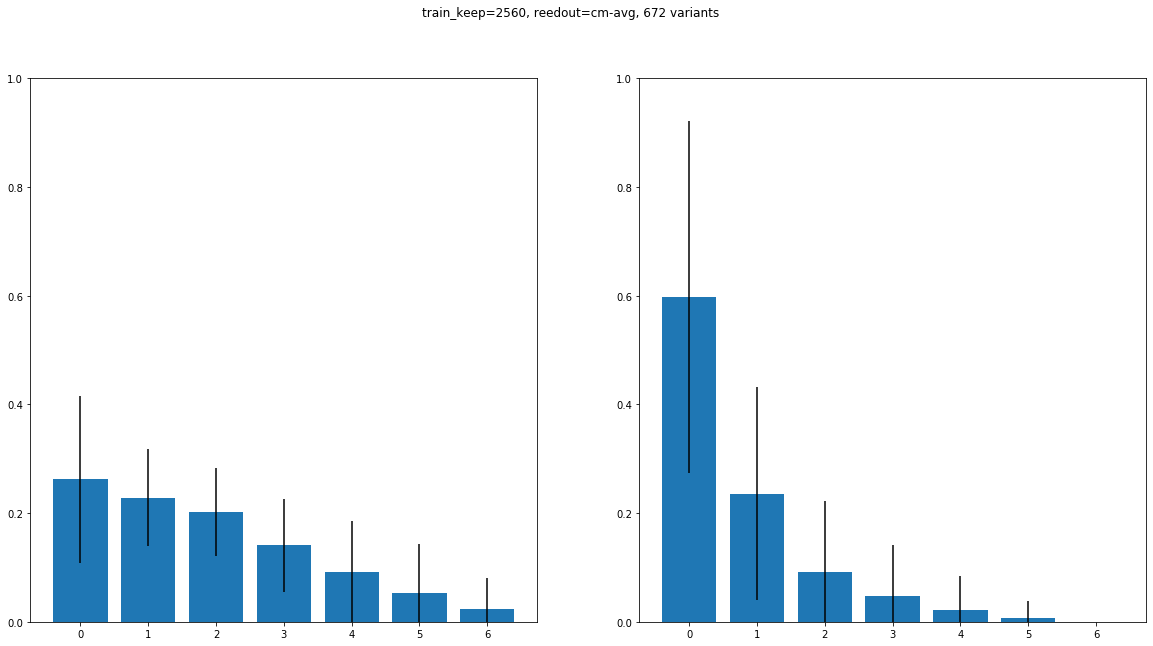

[32, 3]
112 672
[8, 2]
112 672
0.5606125126426672 0.012704095024214114
0.5131837161282653 0.02282645635206459


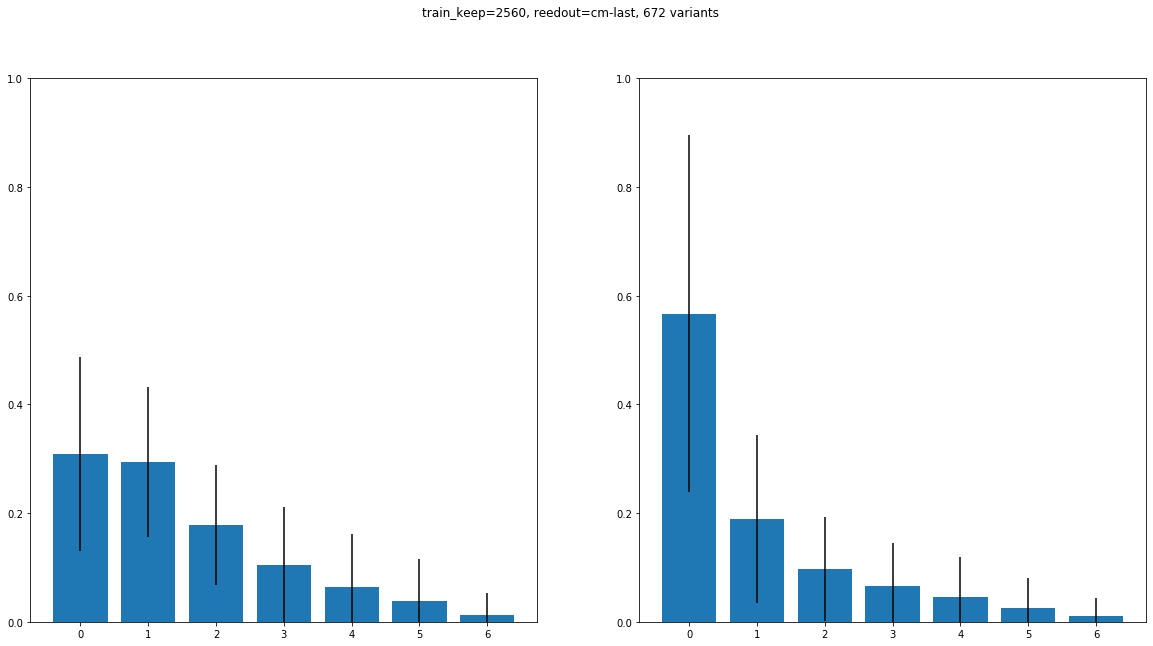

[8, 3]
112 672
[16, 2]
112 672
0.6073951192783628 0.008423518527247459
0.557523126381609 0.026105405122966874


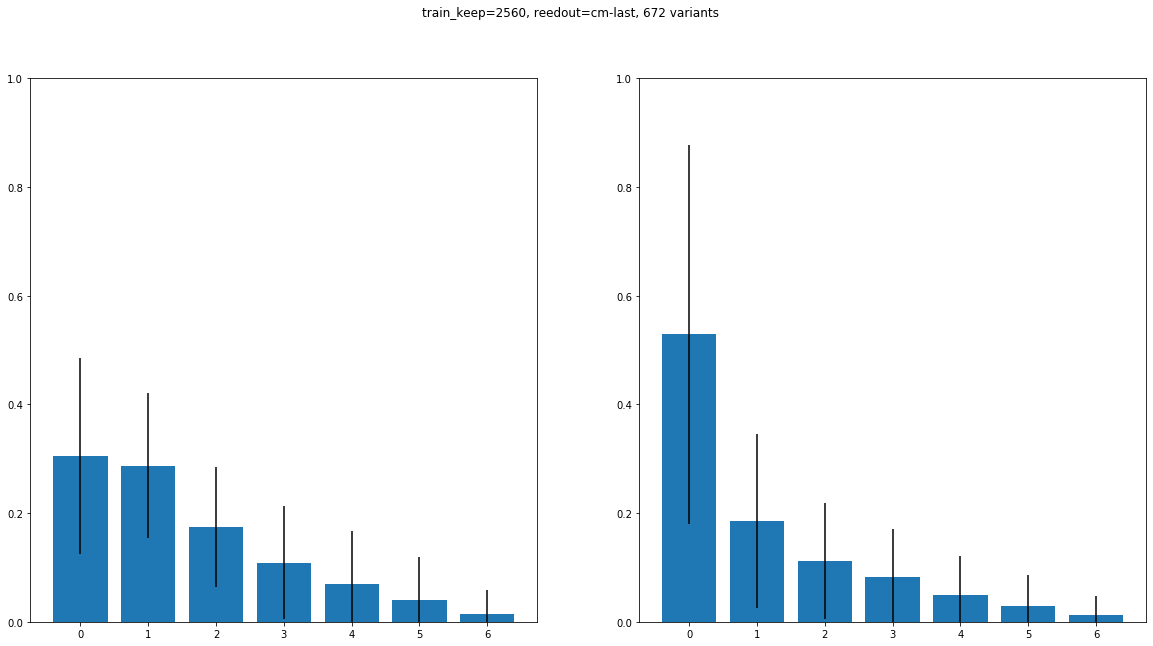

[16, 3]
112 672
[32, 2]
112 672
0.6256112793612938 0.007063810198645882
0.5844889535102886 0.027255839433022587


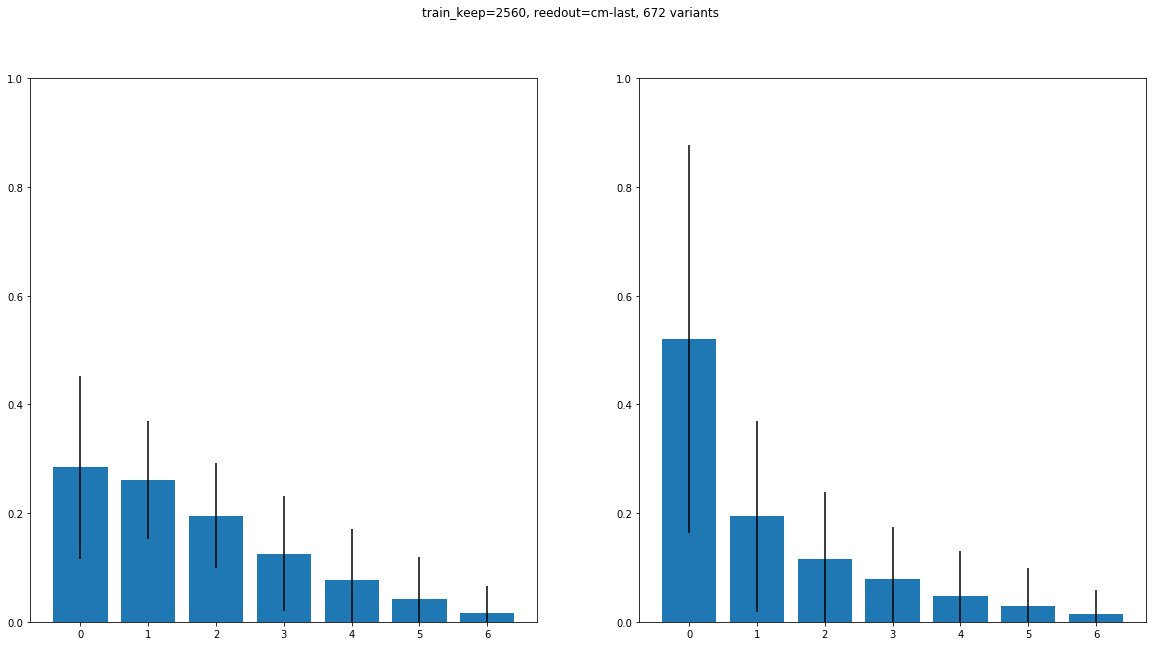

[32, 3]
112 672
[8, 2]
112 672
0.5482578050378967 0.008162321600987404
0.5085128190711508 0.020664521558602676


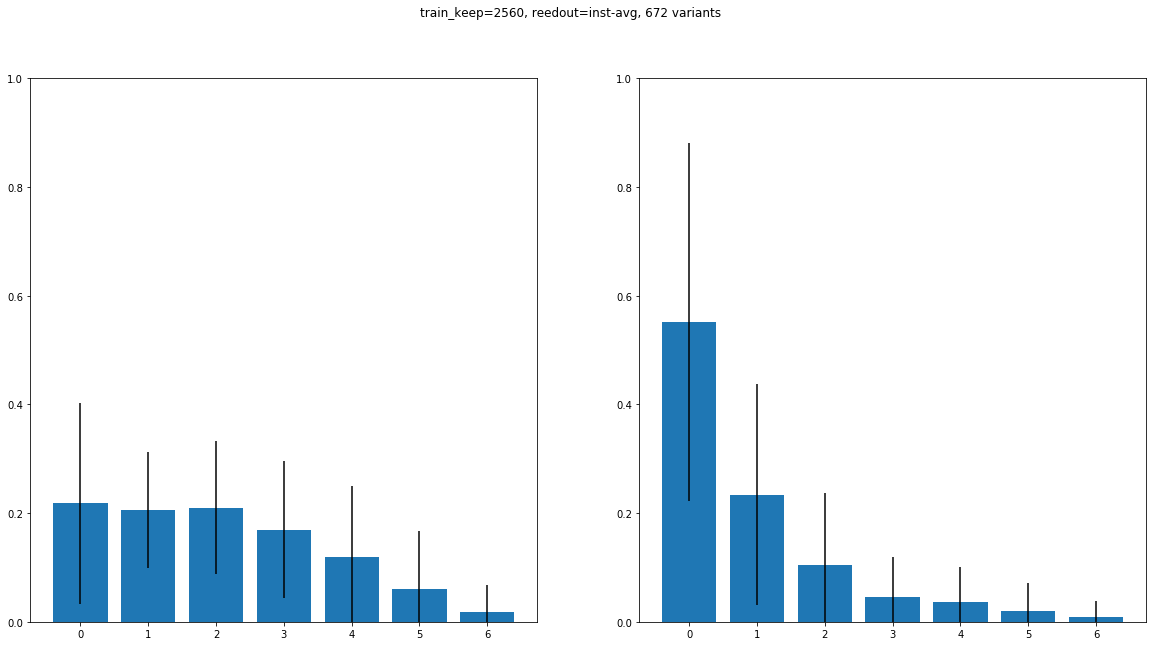

[8, 3]
112 672
[16, 2]
112 672
0.6020112609981854 0.008918495507433413
0.5578195693417707 0.025186215768813823


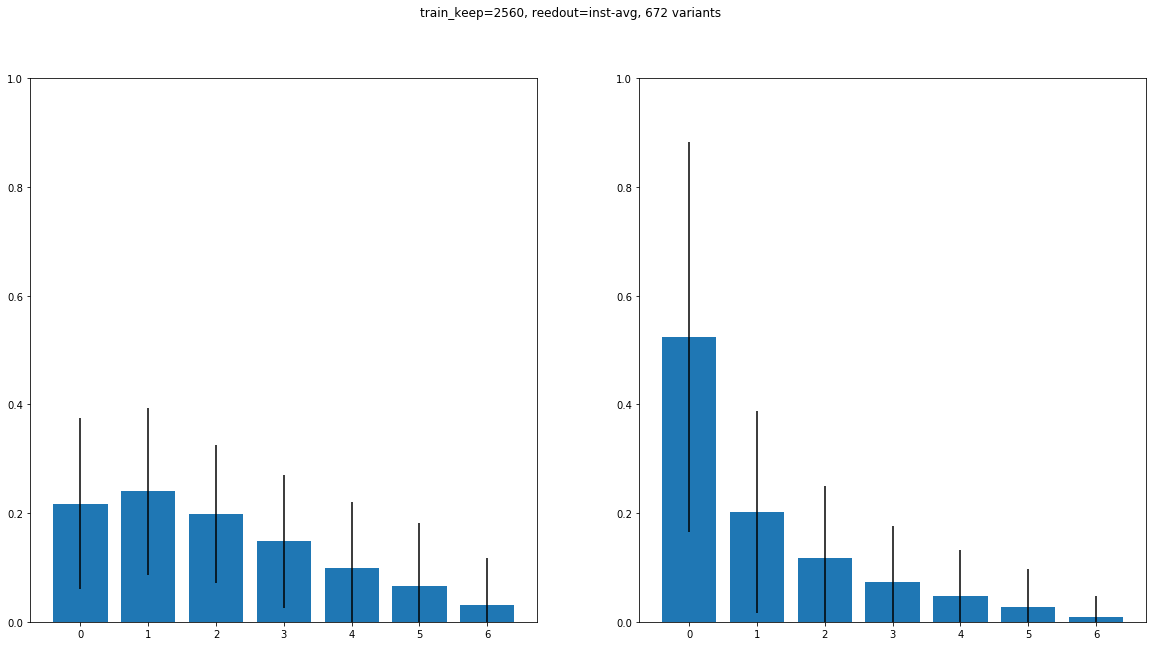

[16, 3]
112 672
[32, 2]
112 672
0.6270074304859637 0.006810409066774251
0.5801376681795478 0.02836365309639866


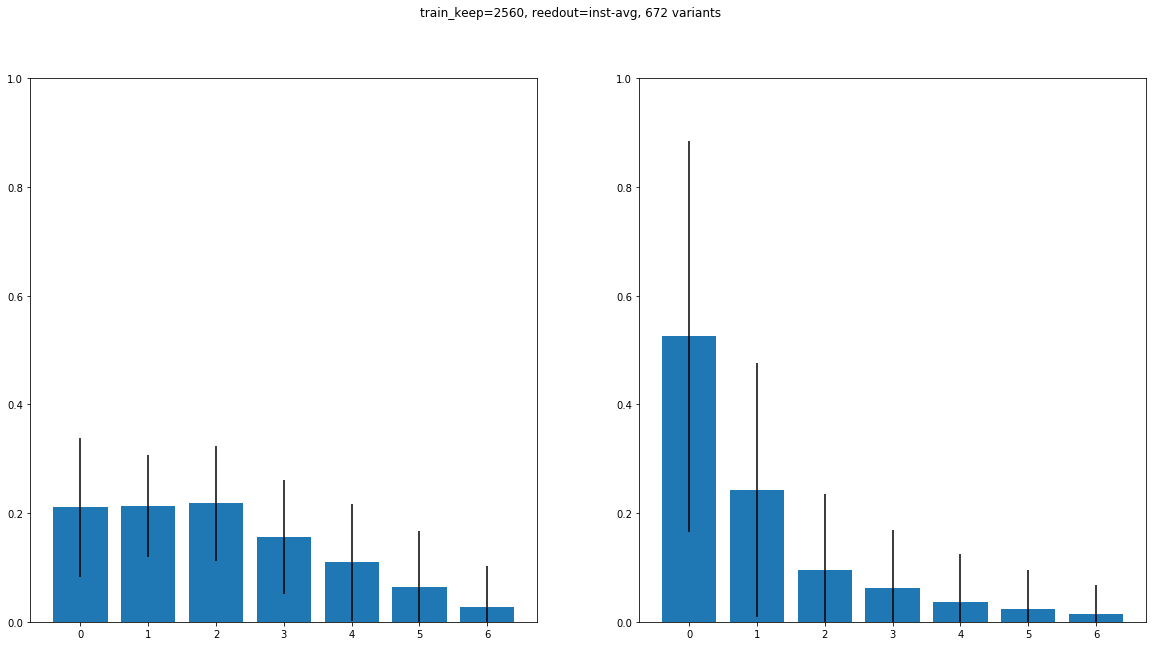

[32, 3]
112 672
[8, 2]
112 672
0.5528583680000579 0.013946635541766148
0.49456520123677533 0.0257158656052175


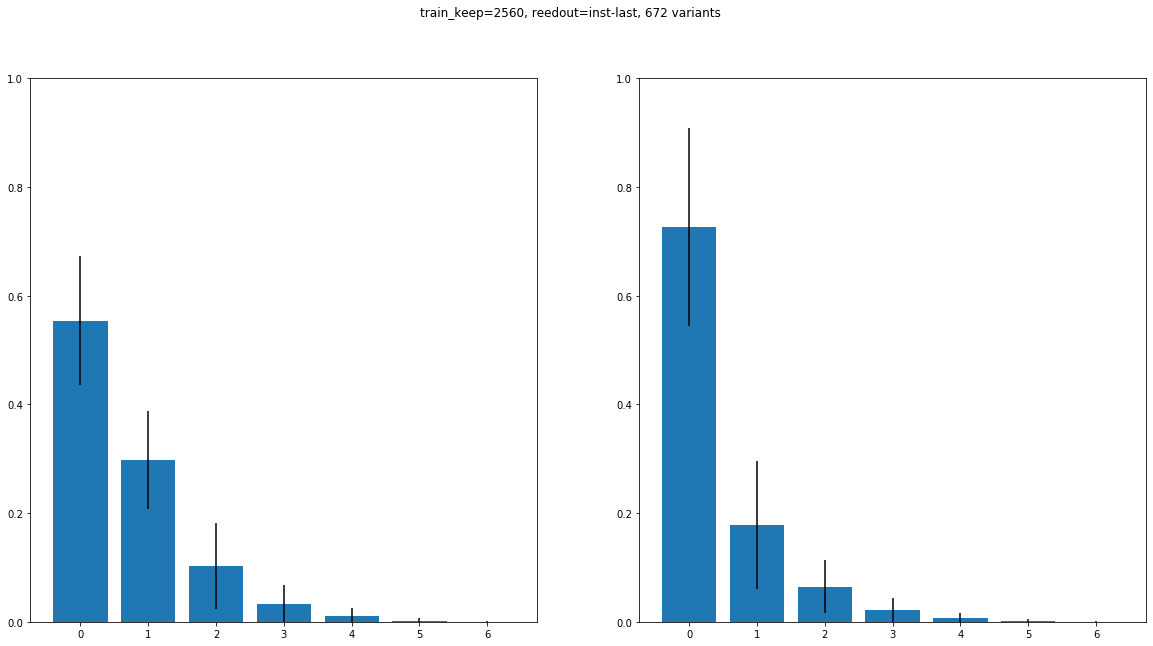

[8, 3]
112 672
[16, 2]
112 672
0.5993762143818512 0.01075858563363173
0.5472807168997604 0.021971909898862784


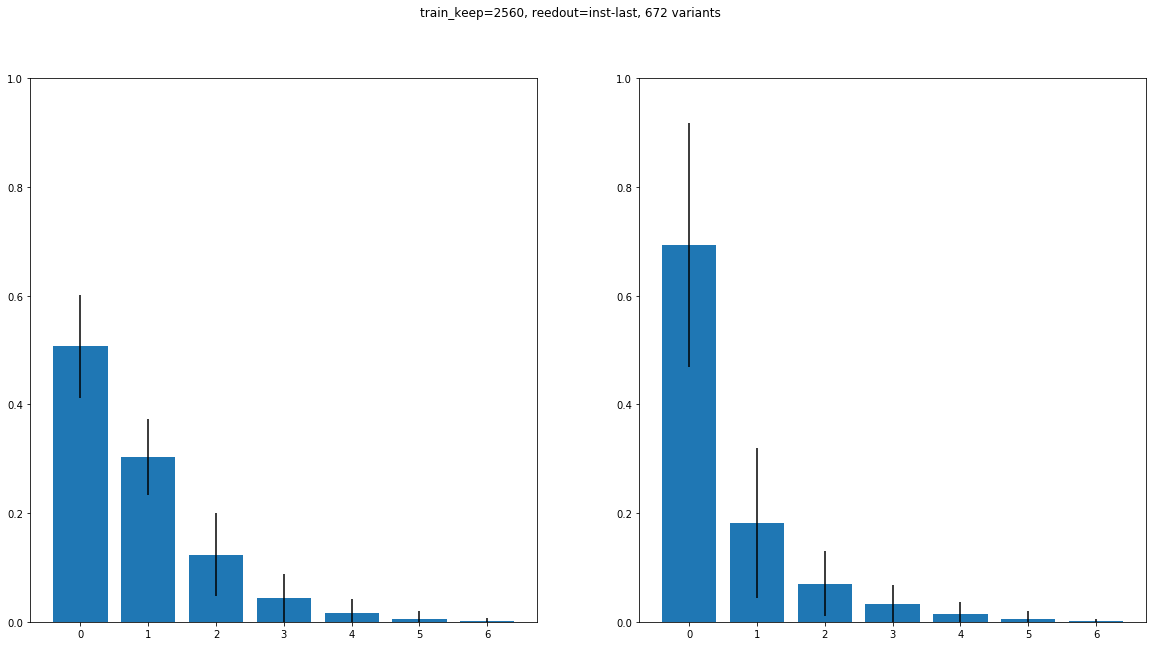

[16, 3]
112 672
[32, 2]
112 672
0.617438925726046 0.009693102967017033
0.5707243224775439 0.019770632007775634


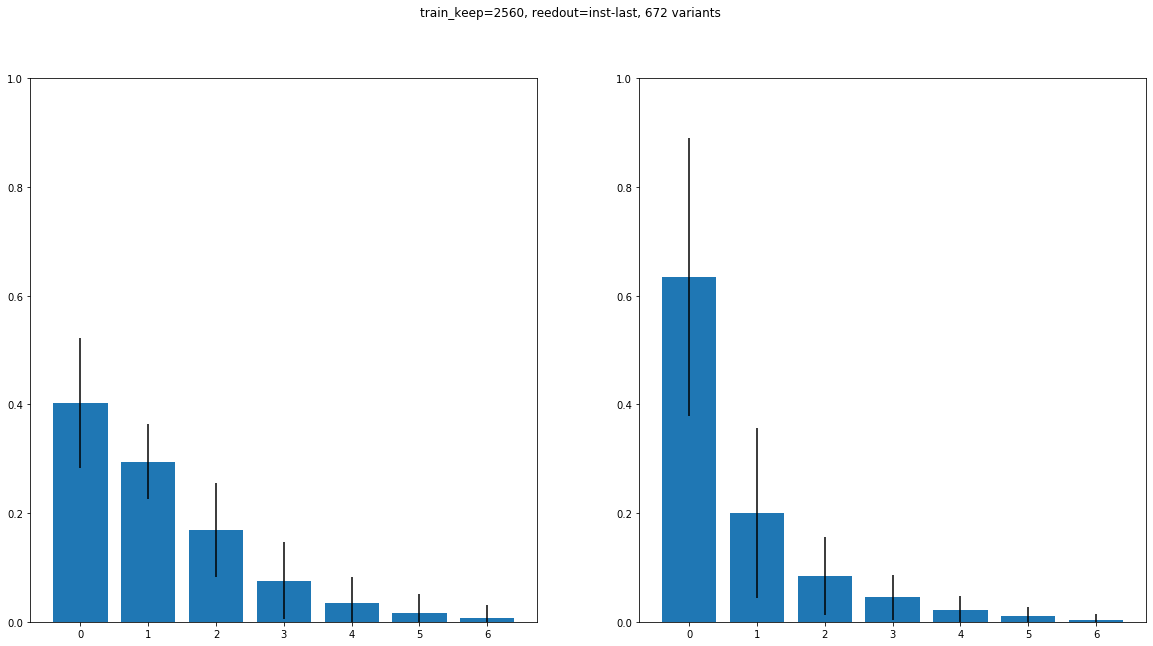

[32, 3]
112 672
[8, 2]
112 672
0.5958730219914752 0.006979851745751933
0.5608556715362332 0.014178604093610579


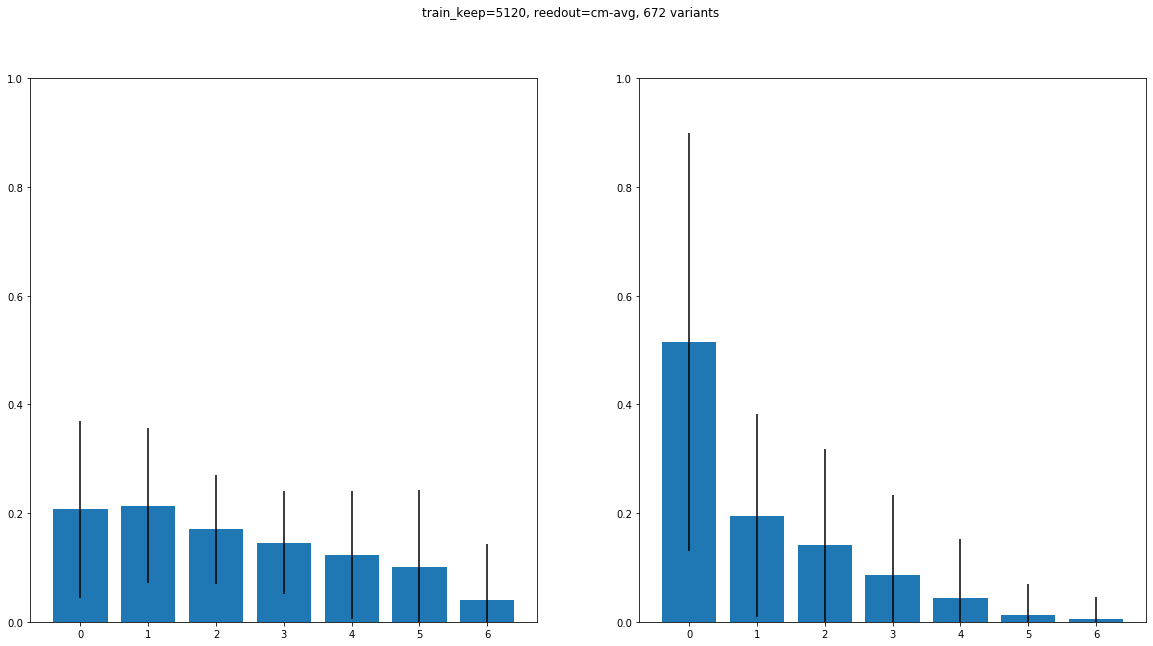

[8, 3]
112 672
[16, 2]
112 672
0.6366006857903449 0.006180112365534202
0.5996612847424193 0.018732454436641875


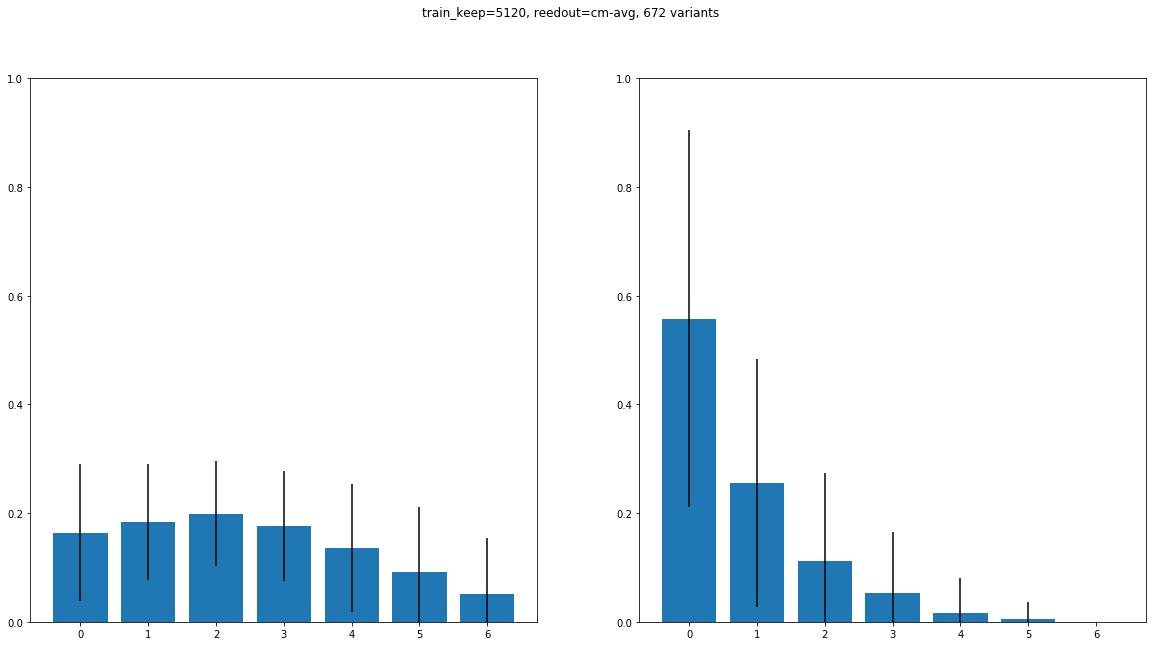

[16, 3]
112 672
[32, 2]
112 672
0.6598074908761908 0.0058080715767823005
0.6170248490304564 0.02284352379841786


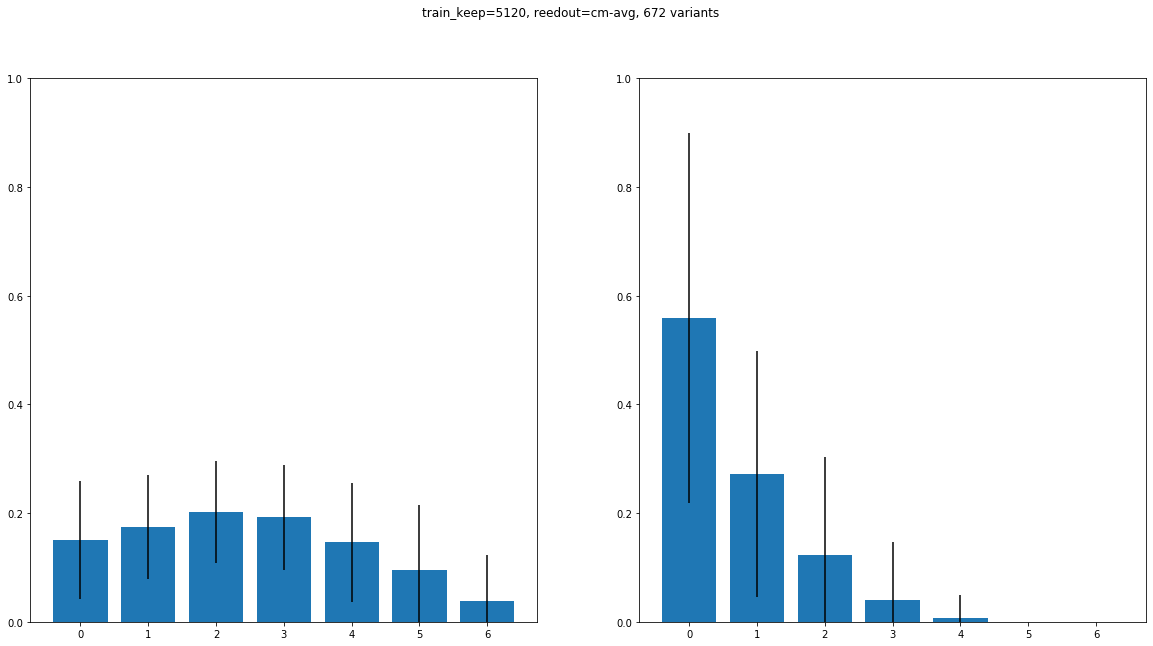

[32, 3]
112 672
[8, 2]
112 672
0.6051951482700292 0.008795620306488559
0.5647724162421361 0.01796702705817235


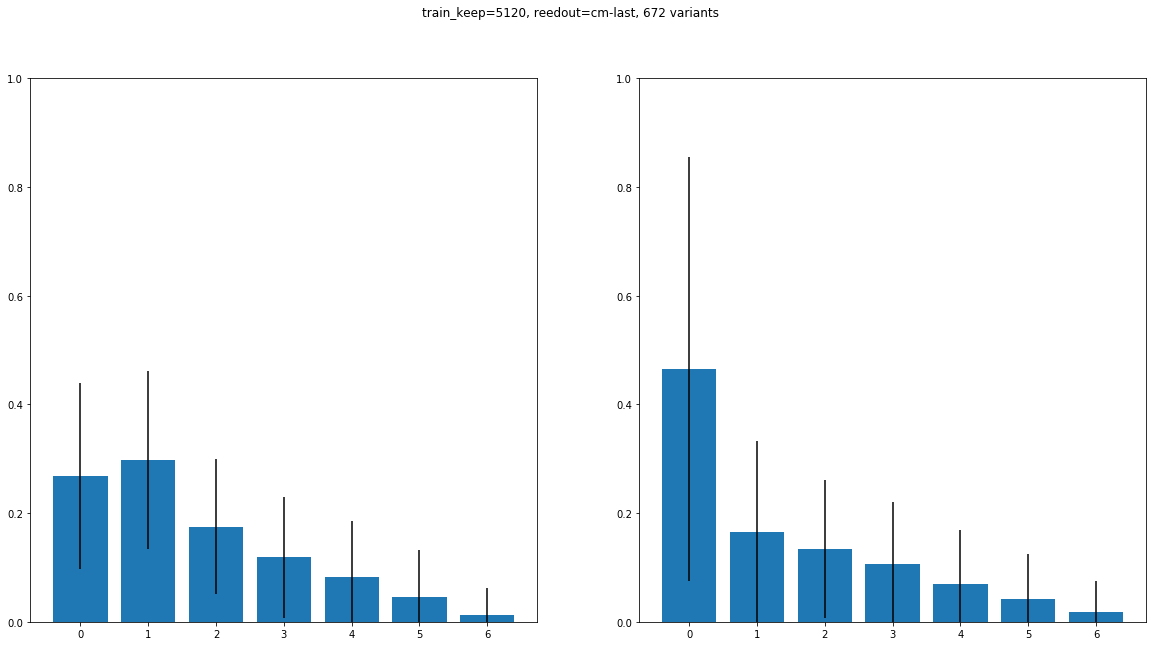

[8, 3]
112 672
[16, 2]
112 672
0.6449440270396761 0.003308545255561808
0.6094412255221369 0.0238716177813336


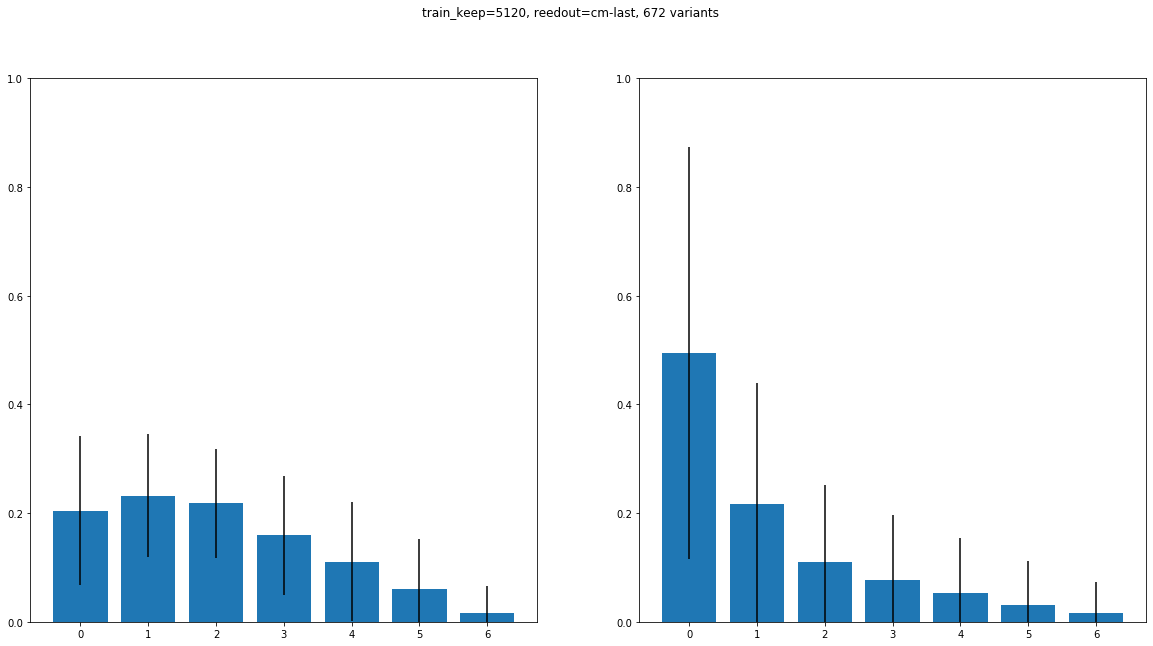

[16, 3]
112 672
[32, 2]
112 672
0.6649459646593108 0.003693477439061719
0.6265228771614192 0.028554518679319314


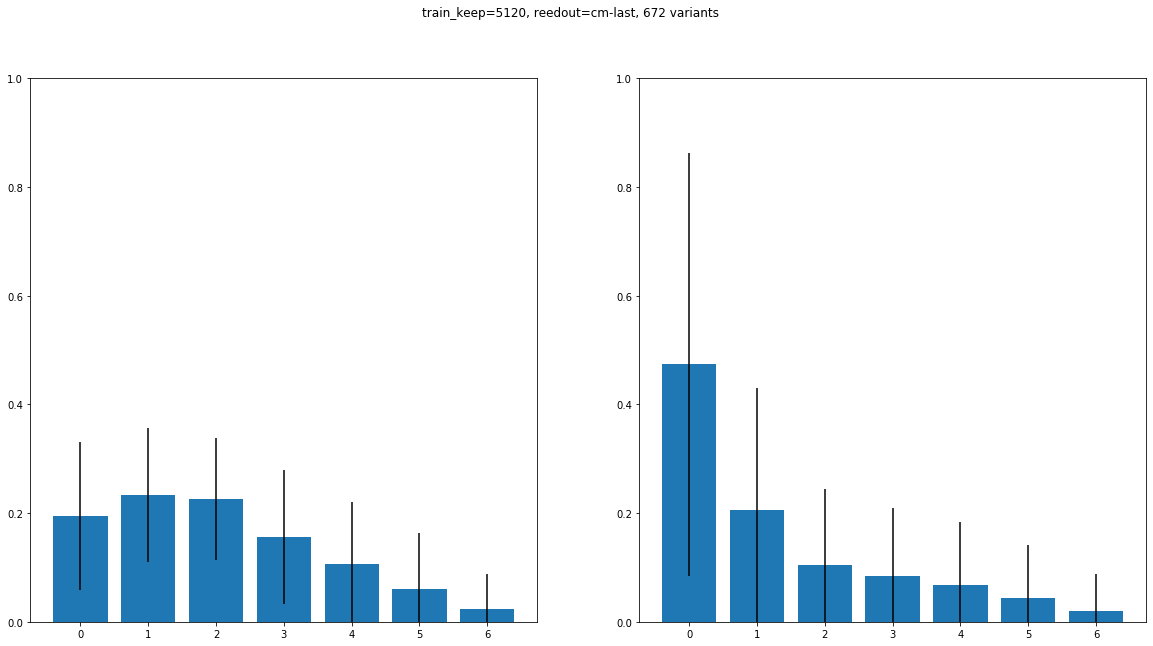

[32, 3]
112 672
[8, 2]
112 672
0.5981440118843144 0.006859217589703137
0.5667051091126593 0.0163646250253792


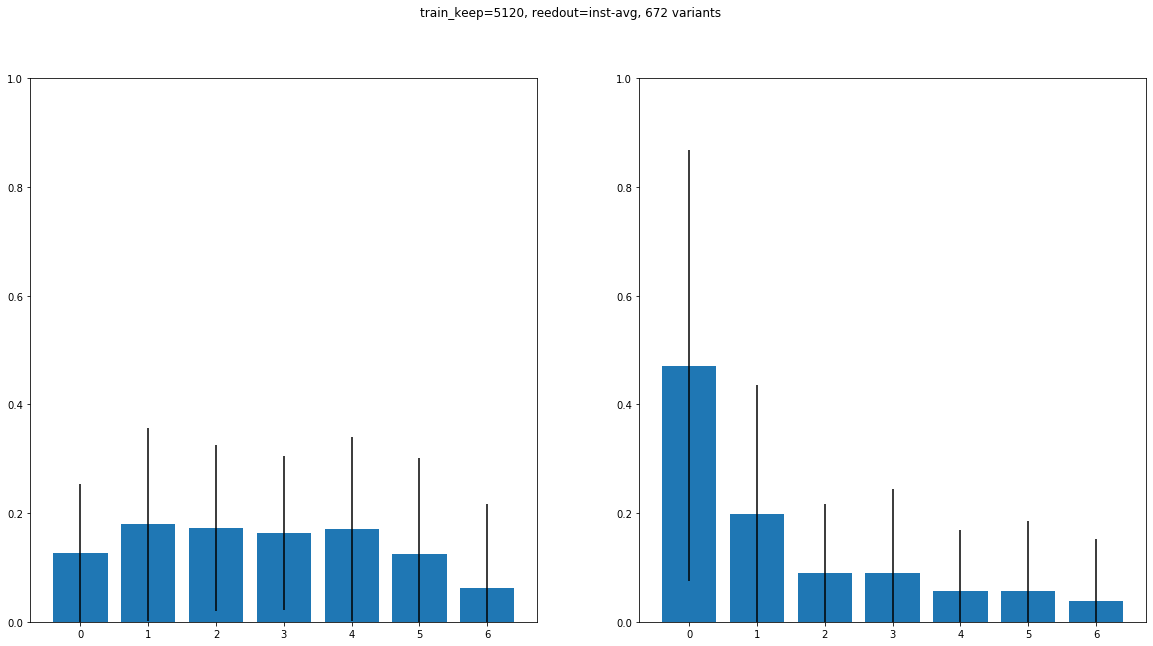

[8, 3]
112 672
[16, 2]
112 672
0.6424949938677199 0.005154311807176541
0.6029827692874773 0.021200447278853462


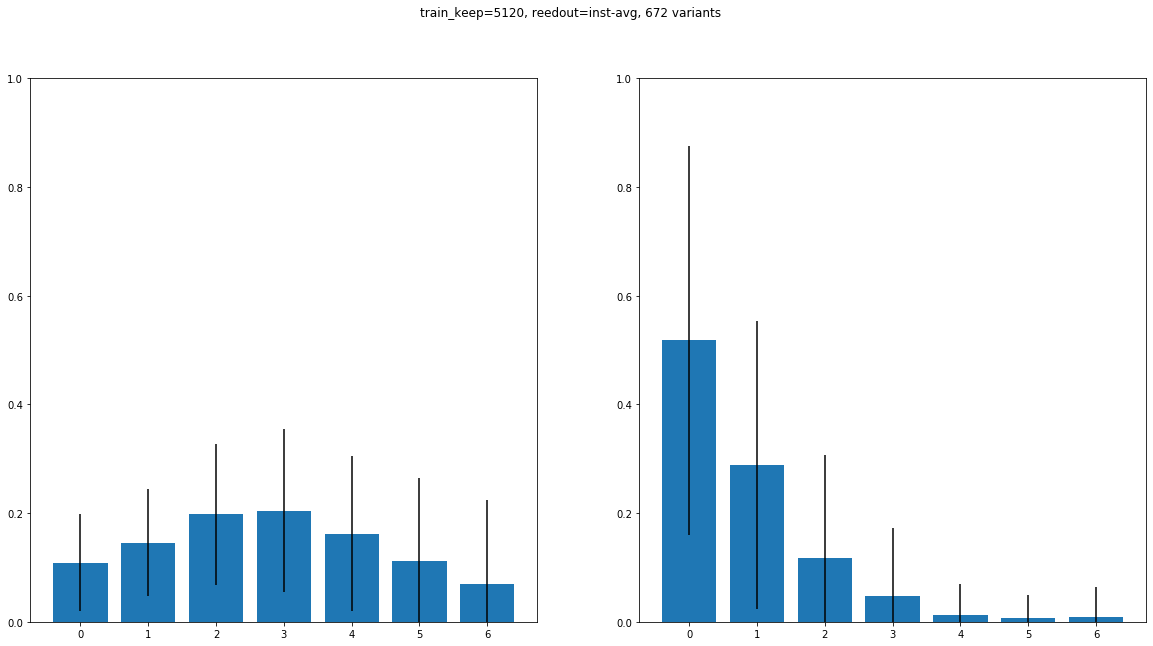

[16, 3]
112 672
[32, 2]
112 672
0.666902374666542 0.004861922548414578
0.621902602130913 0.02676011978850585


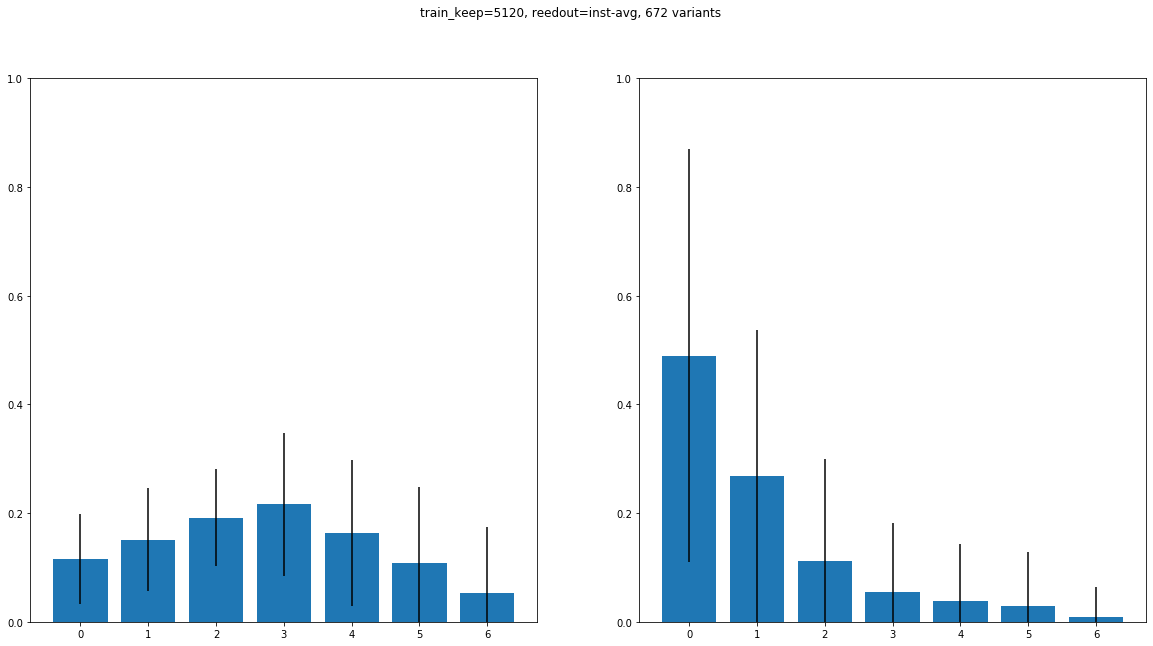

[32, 3]
112 672
[8, 2]
112 672
0.6046679749322179 0.007282700383051252
0.5661153500387176 0.01742034524701392


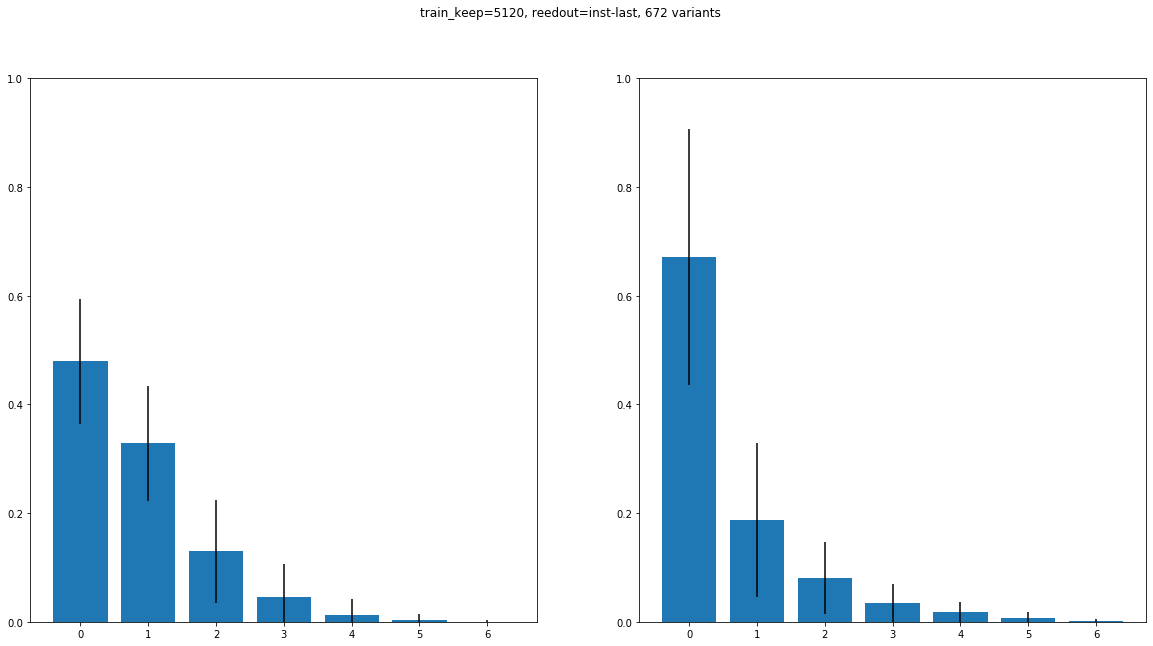

[8, 3]
112 672
[16, 2]
112 672
0.6394217439468103 0.005973224848341955
0.6055518477817562 0.020505213010398496


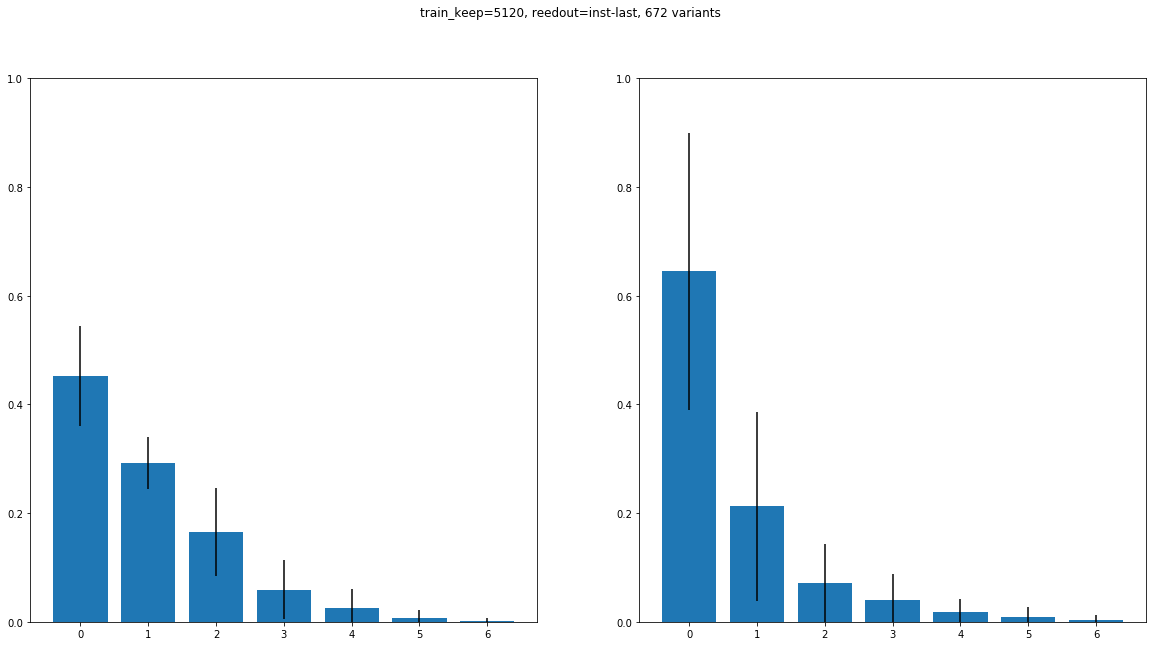

[16, 3]
112 672
[32, 2]
112 672
0.661425946215646 0.004580769450592665
0.6252288875196057 0.027616929634063127


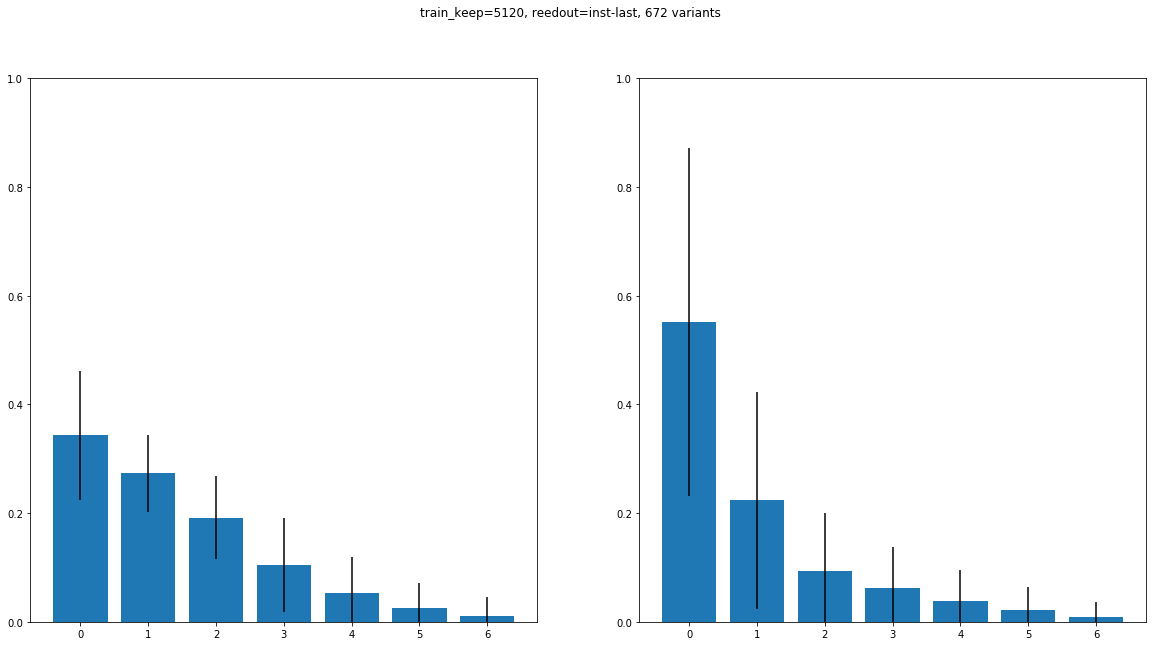

[32, 3]
112 672


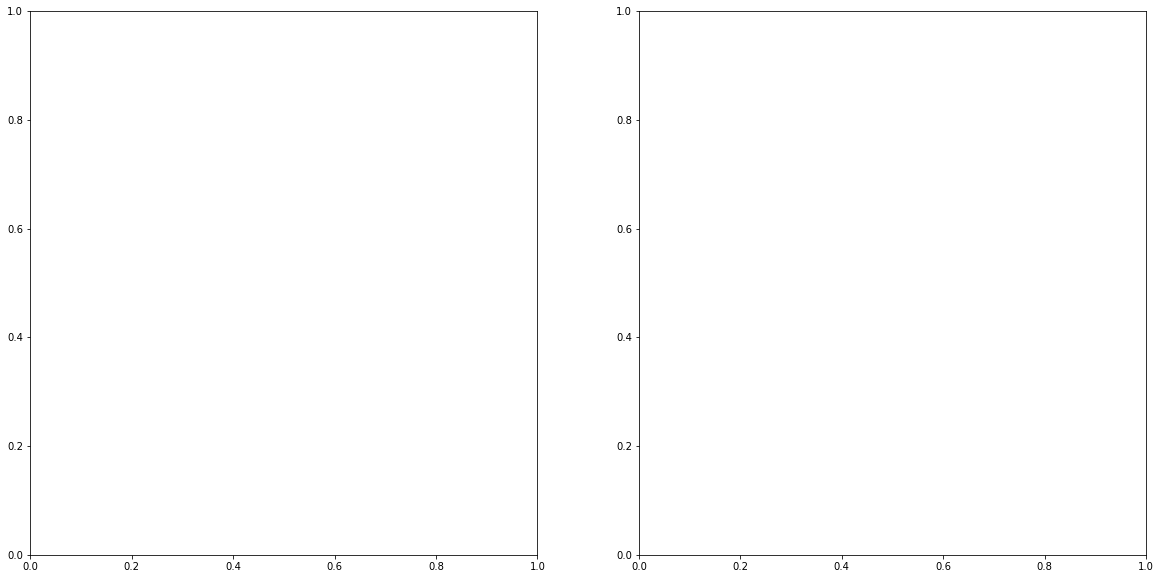

In [13]:
def show_scatter_plots():
    
    for train_keep in df_main_result.index.get_level_values('train_keep').unique():
        df_this_main = df_main_result.xs(train_keep, level='train_keep')
        for readout_type in df_this_main.index.get_level_values('readout_type').unique():
            
            if readout_type == 'legacy':
                continue
            
            df_this_readout = df_this_main.xs(readout_type, level='readout_type')

            index_out_channel = df_this_readout.index.get_level_values('out_channel').values
            index_num_layer = df_this_readout.index.get_level_values('num_layer').values

            data_channel_layer = np.asarray([index_out_channel, index_num_layer]).T
            #     print(data_channel_layer.dtype, data_channel_layer.shape)
            unique_channel_layer = np.unique(data_channel_layer, axis=0).tolist()

            
            
            for key_this in unique_channel_layer:
                
                plt.close('all')
                fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
                axes = axes.ravel()
                
                print(key_this)
                key_this = tuple(key_this)
                (c_this, l_this) = key_this
                df_this = df_this_readout.xs(key=(c_this, l_this), level=('out_channel', 'num_layer'))
                print(len(df_this), len(df_this_readout))
                assert len(df_this)*6 == len(df_this_readout)
                
                if l_this != 2:
                    continue
                # sort
                df_this_sorted = df_this.sort_values('cc2_normed_avg', ascending=False)
                df_this_sorted_top = df_this_sorted.iloc[:50]
                df_this_sorted_bottom = df_this_sorted.iloc[-50:]
                # plot top 50 models
                
                plot_vec_bars(axes[0], df_this_sorted_top)
                
                # plot bottom 50 models
                plot_vec_bars(axes[1], df_this_sorted_bottom)


#             axes[0].legend(loc='best')
#             axes[1].legend(loc='best')
                fig.suptitle(f'train_keep={train_keep}, reedout={readout_type}, {len(df_this_readout)} variants')
#             axes[0].set_title('normal stimuli (black)')
#             axes[1].set_title('inverted stimuli (white)')

#             axes[0].set_xlabel('diff mean')
#             axes[1].set_xlabel('diff mean')
#             axes[0].set_ylabel('diff sem')
                plt.show()

#             print('mean of mean over this readout', df_this_readout['hal_tuning_mean'].mean(), 'mean of sem over this readout', df_this_readout['hal_tuning_sem'].mean())
#             print('mean of mean over this readout, inverted', df_this_readout['hal_tuning_mean_inv'].mean(), 'mean of sem over this readout', df_this_readout['hal_tuning_sem_inv'].mean())
show_scatter_plots()